# **Set Up:**

*Source: Udemy - Python for Data Science and Machine Learning Bootcamp, instructed by Jose Portilla*

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#Get data from csv file
titanic = pd.read_csv('/content/drive/My Drive/pydata/titanic_train.csv')

# **Check Data:**

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


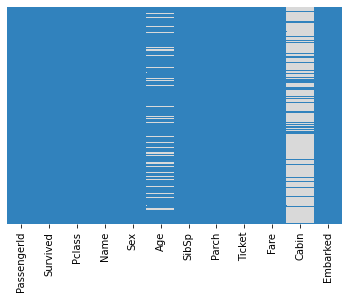

In [9]:
#Check if there are any missing data
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='tab20c')

There are missing data on Age and Cabin. We will deal with it later.

# **Data Analysis:**

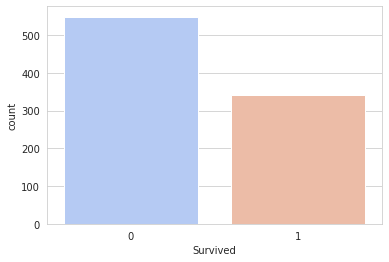

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='coolwarm')

Finding: There are more passangers who did not survived than those who did

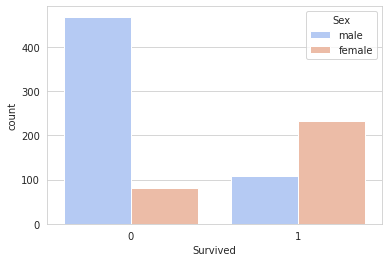

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='coolwarm')

Finding: Among those did not survived, most of them are Male

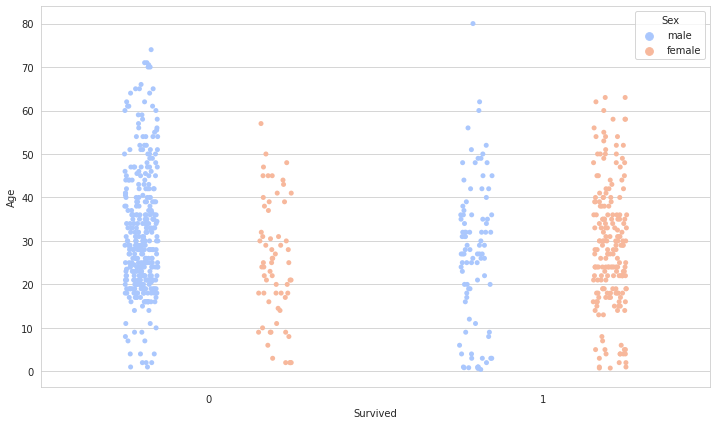

In [12]:
plt.figure(figsize=(12, 7))
sns.set_style('whitegrid')
sns.stripplot(x='Survived',y='Age', data = titanic, hue='Sex',palette='coolwarm', dodge=True)

Finding: Majority of the Male who did not survived are around age 15 to 50

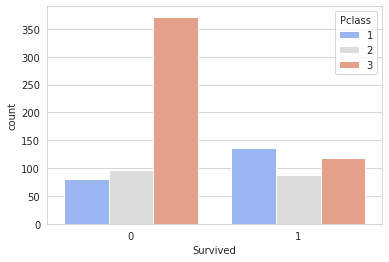

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='coolwarm')

Finding: Most did not survived are from the 3rd Class, which is the cheapest class on Titanic

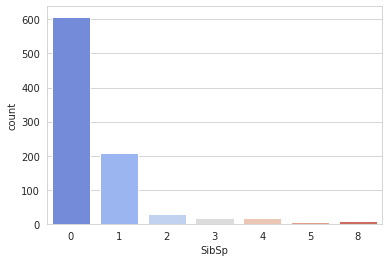

In [14]:
sns.countplot(x='SibSp',data=titanic,palette='coolwarm')

Finding: Most people on Titanic are singles and had no siblings or spouse on the ship with them

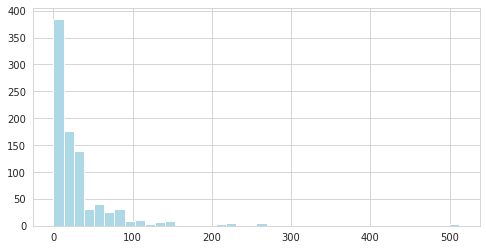

In [15]:
titanic['Fare'].hist(color='lightblue',bins=40,figsize=(8,4))

Findings: most of the ticket sold are below $100

# **Data Cleaning:**


Let's use imputation for the missing data in Age. We will use the average age to fill in the empty data. However, let's break down the passengers in different classes to see how their ages changed. Reason being older people tend to be in higher class (wealthier people). We will run the plot below to justify our hypothesis:

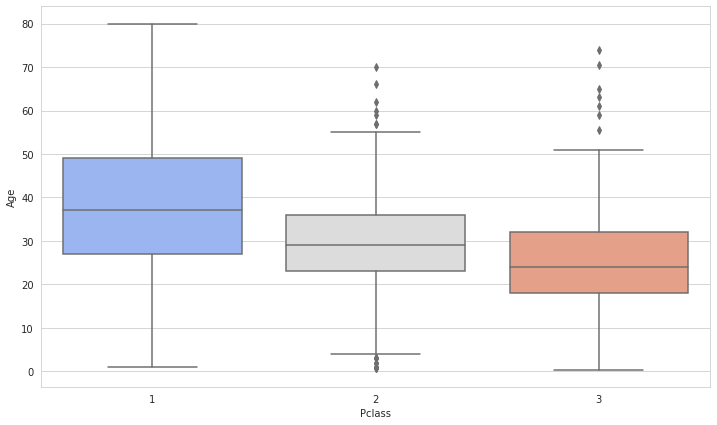

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='coolwarm')

We can see our hypothesis regarding the wealthier passengers in the higher classes tend to be older, is correct. We'll use these average age values to impute based on Pclass for Age.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
#apply the function in our data:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

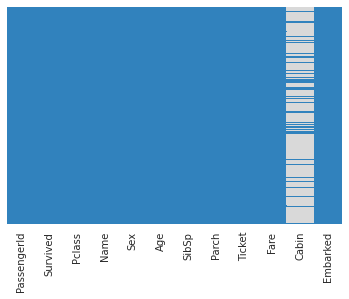

In [19]:
#re-run heat map to make sure data is filled for Age
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='tab20c')

In [20]:
#Going to drop Cabin as there are too many missing data:
titanic.drop('Cabin',axis=1,inplace=True)

In [21]:
#Drop any other NaN value in the data:
titanic.dropna(inplace=True)

# **Converting Categorical Features:**

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
#Create dummies for Sex and Embarked:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [25]:
#Drop columns that will not be used in our model:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
#Check if the drops are inplace
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [28]:
#Re-check data
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


The data is now ready for our model

# **Logistic Regression Model:**

**Train Test Split:**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

**Training and Predicting:**

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predictions = logmodel.predict(X_test)

**Evaluation:**

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [37]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 32,  72]])